In [1]:
import os
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

from glob import glob
from collections import defaultdict
from PIL import Image # type: ignore
import numpy as np # type: ignore
import cv2 # type: ignore

# 1. Images Metadata

In [2]:
# 학습 데이터의 경로와 정보를 가진 파일의 경로를 설정
traindata_dir = "./data/train"
traindata_info_file = "./data/train.csv"

# 테스트 데이터의 경로와 정보를 가진 파일의 경로를 설정
testdata_dir = "./data/test"
testdata_info_file = "./data/test.csv"

In [3]:
import os
os.chdir('/data/ephemeral/home/cv20-proj1/level1-imageclassification-cv-20/suyoung')

In [4]:
# 학습 데이터의 class, image path, target에 대한 정보가 들어있는 csv파일을 읽기
train_data = pd.read_csv(traindata_info_file)

# 테스트 데이터
test_data = pd.read_csv(testdata_info_file)

주어진 학습 데이터셋은 15021개의 항목과 3개의 컬럼으로 구성되어 있다.
1. class_name: 클래스 이름, string
2. image_path: 이미지 파일의 경로, string
3. target: 클래스를 의미하는 숫자아이디, integer

주어진 테스트 데이터셋은 10014개의 항목과 1개의 컬럼으로 구성되어 있다.
1. image_path: 이미지 파일의 경로, string

In [5]:
imagenet_cls_map = {'n02119789': 'kit fox, Vulpes macrotis', 'n02100735': 'English setter', 'n02096294': 'Australian terrier', 'n02066245': 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus', 'n02509815': 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens', 'n02124075': 'Egyptian cat', 'n02417914': 'ibex, Capra ibex', 'n02123394': 'Persian cat', 'n02125311': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 'n02423022': 'gazelle', 'n02346627': 'porcupine, hedgehog', 'n02077923': 'sea lion', 'n02447366': 'badger', 'n02109047': 'Great Dane', 'n02092002': 'Scottish deerhound, deerhound', 'n02071294': 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca', 'n02442845': 'mink', 'n02504458': 'African elephant, Loxodonta africana', 'n02114712': 'red wolf, maned wolf, Canis rufus, Canis niger', 'n02128925': 'jaguar, panther, Panthera onca, Felis onca', 'n02117135': 'hyena, hyaena', 'n02493509': 'titi, titi monkey', 'n02457408': 'three-toed sloth, ai, Bradypus tridactylus', 'n02389026': 'sorrel', 'n02443484': 'black-footed ferret, ferret, Mustela nigripes', 'n02110341': 'dalmatian, coach dog, carriage dog', 'n02093256': 'Staffordshire bullterrier, Staffordshire bull terrier', 'n02106382': 'Bouvier des Flandres, Bouviers des Flandres', 'n02441942': 'weasel', 'n02113712': 'miniature poodle', 'n02415577': 'bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis', 'n02356798': 'fox squirrel, eastern fox squirrel, Sciurus niger', 'n02488702': 'colobus, colobus monkey', 'n02123159': 'tiger cat', 'n02422699': 'impala, Aepyceros melampus', 'n02114855': 'coyote, prairie wolf, brush wolf, Canis latrans', 'n02094433': 'Yorkshire terrier', 'n02111277': 'Newfoundland, Newfoundland dog', 'n02119022': 'red fox, Vulpes vulpes', 'n02422106': 'hartebeest', 'n02120505': 'grey fox, gray fox, Urocyon cinereoargenteus', 'n02086079': 'Pekinese, Pekingese, Peke', 'n02484975': 'guenon, guenon monkey', 'n02137549': 'mongoose', 'n02500267': 'indri, indris, Indri indri, Indri brevicaudatus', 'n02129604': 'tiger, Panthera tigris', 'n02396427': 'wild boar, boar, Sus scrofa', 'n02391049': 'zebra', 'n02412080': 'ram, tup', 'n02480495': 'orangutan, orang, orangutang, Pongo pygmaeus', 'n02110806': 'basenji', 'n02128385': 'leopard, Panthera pardus', 'n02100583': 'vizsla, Hungarian pointer', 'n02494079': 'squirrel monkey, Saimiri sciureus', 'n02123597': 'Siamese cat, Siamese', 'n02481823': 'chimpanzee, chimp, Pan troglodytes', 'n02105505': 'komondor', 'n02489166': 'proboscis monkey, Nasalis larvatus', 'n02364673': 'guinea pig, Cavia cobaya', 'n02114548': 'white wolf, Arctic wolf, Canis lupus tundrarum', 'n02134084': 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus', 'n02480855': 'gorilla, Gorilla gorilla', 'n02403003': 'ox', 'n02108551': 'Tibetan mastiff', 'n02493793': 'spider monkey, Ateles geoffroyi', 'n02107142': 'Doberman, Doberman pinscher', 'n02397096': 'warthog', 'n02437312': 'Arabian camel, dromedary, Camelus dromedarius', 'n02483708': 'siamang, Hylobates syndactylus, Symphalangus syndactylus', 'n02099601': 'golden retriever', 'n02106166': 'Border collie', 'n02326432': 'hare', 'n02108089': 'boxer', 'n02486261': 'patas, hussar monkey, Erythrocebus patas', 'n02486410': 'baboon', 'n02487347': 'macaque', 'n02492035': 'capuchin, ringtail, Cebus capucinus', 'n02099267': 'flat-coated retriever', 'n02395406': 'hog, pig, grunter, squealer, Sus scrofa', 'n02109961': 'Eskimo dog, husky', 'n02101388': 'Brittany spaniel', 'n03187595': 'dial telephone, dial phone', 'n03733281': 'maze, labyrinth', 'n02101006': 'Gordon setter', 'n02115641': 'dingo, warrigal, warragal, Canis dingo', 'n02342885': 'hamster', 'n02120079': 'Arctic fox, white fox, Alopex lagopus', 'n02408429': 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis', 'n02133161': 'American black bear, black bear, Ursus americanus, Euarctos americanus', 'n02328150': 'Angora, Angora rabbit', 'n02410509': 'bison', 'n02492660': 'howler monkey, howler', 'n02398521': 'hippopotamus, hippo, river horse, Hippopotamus amphibius', 'n02510455': 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca', 'n02123045': 'tabby, tabby cat', 'n02490219': 'marmoset', 'n02109525': 'Saint Bernard, St Bernard', 'n02454379': 'armadillo', 'n02090379': 'redbone', 'n02443114': 'polecat, fitch, foulmart, foumart, Mustela putorius', 'n02361337': 'marmot', 'n02483362': 'gibbon, Hylobates lar', 'n02437616': 'llama', 'n02325366': 'wood rabbit, cottontail, cottontail rabbit', 'n02129165': 'lion, king of beasts, Panthera leo', 'n02100877': 'Irish setter, red setter', 'n02074367': 'dugong, Dugong dugon', 'n02504013': 'Indian elephant, Elephas maximus', 'n02363005': 'beaver', 'n02497673': 'Madagascar cat, ring-tailed lemur, Lemur catta', 'n02087394': 'Rhodesian ridgeback', 'n02127052': 'lynx, catamount', 'n02116738': 'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus', 'n02488291': 'langur', 'n02114367': 'timber wolf, grey wolf, gray wolf, Canis lupus', 'n02130308': 'cheetah, chetah, Acinonyx jubatus', 'n02134418': 'sloth bear, Melursus ursinus, Ursus ursinus', 'n02106662': 'German shepherd, German shepherd dog, German police dog, alsatian', 'n02444819': 'otter', 'n01882714': 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus', 'n01871265': 'tusker', 'n01872401': 'echidna, spiny anteater, anteater', 'n01877812': 'wallaby, brush kangaroo', 'n01873310': 'platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus', 'n01883070': 'wombat', 'n04086273': 'revolver, six-gun, six-shooter', 'n04507155': 'umbrella', 'n04147183': 'schooner', 'n04254680': 'soccer ball', 'n02672831': 'accordion, piano accordion, squeeze box', 'n02219486': 'ant, emmet, pismire', 'n02317335': 'starfish, sea star', 'n01968897': 'chambered nautilus, pearly nautilus, nautilus', 'n03452741': 'grand piano, grand', 'n03642806': 'laptop, laptop computer', 'n07745940': 'strawberry', 'n02690373': 'airliner', 'n04552348': 'warplane, military plane', 'n02692877': 'airship, dirigible', 'n02782093': 'balloon', 'n04266014': 'space shuttle', 'n03344393': 'fireboat', 'n03447447': 'gondola', 'n04273569': 'speedboat', 'n03662601': 'lifeboat', 'n02951358': 'canoe', 'n04612504': 'yawl', 'n02981792': 'catamaran', 'n04483307': 'trimaran', 'n03095699': 'container ship, containership, container vessel', 'n03673027': 'liner, ocean liner', 'n03947888': 'pirate, pirate ship', 'n02687172': 'aircraft carrier, carrier, flattop, attack aircraft carrier', 'n04347754': 'submarine, pigboat, sub, U-boat', 'n04606251': 'wreck', 'n03478589': 'half track', 'n04389033': 'tank, army tank, armored combat vehicle, armoured combat vehicle', 'n03773504': 'missile', 'n02860847': 'bobsled, bobsleigh, bob', 'n03218198': 'dogsled, dog sled, dog sleigh', 'n02835271': 'bicycle-built-for-two, tandem bicycle, tandem', 'n03792782': 'mountain bike, all-terrain bike, off-roader', 'n03393912': 'freight car', 'n03895866': 'passenger car, coach, carriage', 'n02797295': 'barrow, garden cart, lawn cart, wheelbarrow', 'n04204347': 'shopping cart', 'n03791053': 'motor scooter, scooter', 'n03384352': 'forklift', 'n03272562': 'electric locomotive', 'n04310018': 'steam locomotive', 'n02704792': 'amphibian, amphibious vehicle', 'n02701002': 'ambulance', 'n02814533': 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon', 'n02930766': 'cab, hack, taxi, taxicab', 'n03100240': 'convertible', 'n03594945': 'jeep, landrover', 'n03670208': 'limousine, limo', 'n03770679': 'minivan', 'n03777568': 'Model T', 'n04037443': 'racer, race car, racing car', 'n04285008': 'sports car, sport car', 'n03444034': 'go-kart', 'n03445924': 'golfcart, golf cart', 'n03785016': 'moped', 'n04252225': 'snowplow, snowplough', 'n03345487': 'fire engine, fire truck', 'n03417042': 'garbage truck, dustcart', 'n03930630': 'pickup, pickup truck', 'n04461696': 'tow truck, tow car, wrecker', 'n04467665': 'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi', 'n03796401': 'moving van', 'n03977966': 'police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria', 'n04065272': 'recreational vehicle, RV, R.V.', 'n04335435': 'streetcar, tram, tramcar, trolley, trolley car', 'n04252077': 'snowmobile', 'n04465501': 'tractor', 'n03776460': 'mobile home, manufactured home', 'n04482393': 'tricycle, trike, velocipede', 'n04509417': 'unicycle, monocycle', 'n03538406': 'horse cart, horse-cart', 'n03788365': 'mosquito net', 'n03868242': 'oxcart', 'n02804414': 'bassinet', 'n03125729': 'cradle', 'n03131574': 'crib, cot', 'n03388549': 'four-poster', 'n02870880': 'bookcase', 'n03018349': 'china cabinet, china closet', 'n03742115': 'medicine chest, medicine cabinet', 'n03016953': 'chiffonier, commode', 'n04380533': 'table lamp', 'n03337140': 'file, file cabinet, filing cabinet', 'n03902125': 'pay-phone, pay-station', 'n03891251': 'park bench', 'n02791124': 'barber chair', 'n04429376': 'throne', 'n03376595': 'folding chair', 'n04099969': 'rocking chair, rocker', 'n04344873': 'studio couch, day bed', 'n04447861': 'toilet seat', 'n03179701': 'desk', 'n03982430': 'pool table, billiard table, snooker table', 'n03201208': 'dining table, board', 'n03290653': 'entertainment center', 'n04550184': 'wardrobe, closet, press', 'n07742313': 'Granny Smith', 'n07747607': 'orange', 'n07749582': 'lemon', 'n07753113': 'fig', 'n07753275': 'pineapple, ananas', 'n07753592': 'banana', 'n07754684': 'jackfruit, jak, jack', 'n07760859': 'custard apple', 'n07768694': 'pomegranate', 'n12267677': 'acorn', 'n12620546': 'hip, rose hip, rosehip', 'n13133613': 'ear, spike, capitulum', 'n11879895': 'rapeseed', 'n12144580': 'corn', 'n12768682': 'buckeye, horse chestnut, conker', 'n03854065': 'organ, pipe organ', 'n04515003': 'upright, upright piano', 'n03017168': 'chime, bell, gong', 'n03249569': 'drum, membranophone, tympan', 'n03447721': 'gong, tam-tam', 'n03720891': 'maraca', 'n03721384': 'marimba, xylophone', 'n04311174': 'steel drum', 'n02787622': 'banjo', 'n02992211': 'cello, violoncello', 'n03637318': 'lampshade, lamp shade', 'n03495258': 'harp', 'n02676566': 'acoustic guitar', 'n03272010': 'electric guitar', 'n03110669': 'cornet, horn, trumpet, trump', 'n03394916': 'French horn, horn', 'n04487394': 'trombone', 'n03494278': 'harmonica, mouth organ, harp, mouth harp', 'n03840681': 'ocarina, sweet potato', 'n03884397': 'panpipe, pandean pipe, syrinx', 'n02804610': 'bassoon', 'n04141076': 'sax, saxophone', 'n03372029': 'flute, transverse flute', 'n11939491': 'daisy', 'n12057211': "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum", 'n09246464': 'cliff, drop, drop-off', 'n09468604': 'valley, vale', 'n09193705': 'alp', 'n09472597': 'volcano', 'n09399592': 'promontory, headland, head, foreland', 'n09421951': 'sandbar, sand bar', 'n09256479': 'coral reef', 'n09332890': 'lakeside, lakeshore', 'n09428293': 'seashore, coast, seacoast, sea-coast', 'n09288635': 'geyser', 'n03498962': 'hatchet', 'n03041632': 'cleaver, meat cleaver, chopper', 'n03658185': 'letter opener, paper knife, paperknife', 'n03954731': "plane, carpenter's plane, woodworking plane", 'n03995372': 'power drill', 'n03649909': 'lawn mower, mower', 'n03481172': 'hammer', 'n03109150': 'corkscrew, bottle screw', 'n02951585': 'can opener, tin opener', 'n03970156': "plunger, plumber's helper", 'n04154565': 'screwdriver', 'n04208210': 'shovel', 'n03967562': 'plow, plough', 'n03000684': 'chain saw, chainsaw', 'n01514668': 'cock', 'n01514859': 'hen', 'n01518878': 'ostrich, Struthio camelus', 'n01530575': 'brambling, Fringilla montifringilla', 'n01531178': 'goldfinch, Carduelis carduelis', 'n01532829': 'house finch, linnet, Carpodacus mexicanus', 'n01534433': 'junco, snowbird', 'n01537544': 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'n01558993': 'robin, American robin, Turdus migratorius', 'n01560419': 'bulbul', 'n01580077': 'jay', 'n01582220': 'magpie', 'n01592084': 'chickadee', 'n01601694': 'water ouzel, dipper', 'n01608432': 'kite', 'n01614925': 'bald eagle, American eagle, Haliaeetus leucocephalus', 'n01616318': 'vulture', 'n01622779': 'great grey owl, great gray owl, Strix nebulosa', 'n01795545': 'black grouse', 'n01796340': 'ptarmigan', 'n01797886': 'ruffed grouse, partridge, Bonasa umbellus', 'n01798484': 'prairie chicken, prairie grouse, prairie fowl', 'n01806143': 'peacock', 'n01806567': 'quail', 'n01807496': 'partridge', 'n01817953': 'African grey, African gray, Psittacus erithacus', 'n01818515': 'macaw', 'n01819313': 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita', 'n01820546': 'lorikeet', 'n01824575': 'coucal', 'n01828970': 'bee eater', 'n01829413': 'hornbill', 'n01833805': 'hummingbird', 'n01843065': 'jacamar', 'n01843383': 'toucan', 'n01847000': 'drake', 'n01855032': 'red-breasted merganser, Mergus serrator', 'n01855672': 'goose', 'n01860187': 'black swan, Cygnus atratus', 'n02002556': 'white stork, Ciconia ciconia', 'n02002724': 'black stork, Ciconia nigra', 'n02006656': 'spoonbill', 'n02007558': 'flamingo', 'n02009912': 'American egret, great white heron, Egretta albus', 'n02009229': 'little blue heron, Egretta caerulea', 'n02011460': 'bittern', 'n02012849': 'crane', 'n02013706': 'limpkin, Aramus pictus', 'n02018207': 'American coot, marsh hen, mud hen, water hen, Fulica americana', 'n02018795': 'bustard', 'n02025239': 'ruddy turnstone, Arenaria interpres', 'n02027492': 'red-backed sandpiper, dunlin, Erolia alpina', 'n02028035': 'redshank, Tringa totanus', 'n02033041': 'dowitcher', 'n02037110': 'oystercatcher, oyster catcher', 'n02017213': 'European gallinule, Porphyrio porphyrio', 'n02051845': 'pelican', 'n02056570': 'king penguin, Aptenodytes patagonica', 'n02058221': 'albatross, mollymawk', 'n01484850': 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'n01491361': 'tiger shark, Galeocerdo cuvieri', 'n01494475': 'hammerhead, hammerhead shark', 'n01496331': 'electric ray, crampfish, numbfish, torpedo', 'n01498041': 'stingray', 'n02514041': 'barracouta, snoek', 'n02536864': 'coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch', 'n01440764': 'tench, Tinca tinca', 'n01443537': 'goldfish, Carassius auratus', 'n02526121': 'eel', 'n02606052': 'rock beauty, Holocanthus tricolor', 'n02607072': 'anemone fish', 'n02643566': 'lionfish', 'n02655020': 'puffer, pufferfish, blowfish, globefish', 'n02640242': 'sturgeon', 'n02641379': 'gar, garfish, garpike, billfish, Lepisosteus osseus', 'n01664065': 'loggerhead, loggerhead turtle, Caretta caretta', 'n01667114': 'mud turtle', 'n01667778': 'terrapin', 'n01669191': 'box turtle, box tortoise', 'n01675722': 'banded gecko', 'n01677366': 'common iguana, iguana, Iguana iguana', 'n01682714': 'American chameleon, anole, Anolis carolinensis', 'n01685808': 'whiptail, whiptail lizard', 'n01687978': 'agama', 'n01688243': 'frilled lizard, Chlamydosaurus kingi', 'n01689811': 'alligator lizard', 'n01692333': 'Gila monster, Heloderma suspectum', 'n01693334': 'green lizard, Lacerta viridis', 'n01694178': 'African chameleon, Chamaeleo chamaeleon', 'n01695060': 'Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis', 'n01704323': 'triceratops', 'n01697457': 'African crocodile, Nile crocodile, Crocodylus niloticus', 'n01698640': 'American alligator, Alligator mississipiensis', 'n01728572': 'thunder snake, worm snake, Carphophis amoenus', 'n01728920': 'ringneck snake, ring-necked snake, ring snake', 'n01729322': 'hognose snake, puff adder, sand viper', 'n01729977': 'green snake, grass snake', 'n01734418': 'king snake, kingsnake', 'n01735189': 'garter snake, grass snake', 'n01737021': 'water snake', 'n01739381': 'vine snake', 'n01740131': 'night snake, Hypsiglena torquata', 'n01742172': 'boa constrictor, Constrictor constrictor', 'n01744401': 'rock python, rock snake, Python sebae', 'n01748264': 'Indian cobra, Naja naja', 'n01749939': 'green mamba', 'n01751748': 'sea snake', 'n01753488': 'horned viper, cerastes, sand viper, horned asp, Cerastes cornutus', 'n04326547': 'stone wall', 'n01756291': 'sidewinder, horned rattlesnake, Crotalus cerastes', 'n01629819': 'European fire salamander, Salamandra salamandra', 'n01630670': 'common newt, Triturus vulgaris', 'n01631663': 'eft', 'n01632458': 'spotted salamander, Ambystoma maculatum', 'n01632777': 'axolotl, mud puppy, Ambystoma mexicanum', 'n01641577': 'bullfrog, Rana catesbeiana', 'n01644373': 'tree frog, tree-frog', 'n01644900': 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui', 'n04579432': 'whistle', 'n04592741': 'wing', 'n03876231': 'paintbrush', 'n03868863': 'oxygen mask', 'n04251144': 'snorkel', 'n03691459': 'loudspeaker, speaker, speaker unit, loudspeaker system, speaker system', 'n03759954': 'microphone, mike', 'n04152593': 'screen, CRT screen', 'n03793489': 'mouse, computer mouse', 'n03271574': 'electric fan, blower', 'n03843555': 'oil filter', 'n04332243': 'strainer', 'n04265275': 'space heater', 'n04330267': 'stove', 'n03467068': 'guillotine', 'n02794156': 'barometer', 'n04118776': 'rule, ruler', 'n03841143': 'odometer, hodometer, mileometer, milometer', 'n04141975': 'scale, weighing machine', 'n02708093': 'analog clock', 'n03196217': 'digital clock', 'n04548280': 'wall clock', 'n03544143': 'hourglass', 'n04355338': 'sundial', 'n03891332': 'parking meter', 'n04328186': 'stopwatch, stop watch', 'n03197337': 'digital watch', 'n04317175': 'stethoscope', 'n04376876': 'syringe', 'n03706229': 'magnetic compass', 'n02841315': 'binoculars, field glasses, opera glasses', 'n04009552': 'projector', 'n04356056': 'sunglasses, dark glasses, shades', 'n03692522': "loupe, jeweler's loupe", 'n04044716': 'radio telescope, radio reflector', 'n02879718': 'bow', 'n02950826': 'cannon', 'n02749479': 'assault rifle, assault gun', 'n04090263': 'rifle', 'n04008634': 'projectile, missile', 'n03085013': 'computer keyboard, keypad', 'n04505470': 'typewriter keyboard', 'n03126707': 'crane', 'n03666591': 'lighter, light, igniter, ignitor', 'n02666196': 'abacus', 'n02977058': 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM', 'n04238763': 'slide rule, slipstick', 'n03180011': 'desktop computer', 'n03485407': 'hand-held computer, hand-held microcomputer', 'n03832673': 'notebook, notebook computer', 'n03874599': 'padlock', 'n03496892': 'harvester, reaper', 'n04428191': 'thresher, thrasher, threshing machine', 'n04004767': 'printer', 'n04243546': 'slot, one-armed bandit', 'n04525305': 'vending machine', 'n04179913': 'sewing machine', 'n03602883': 'joystick', 'n04372370': 'switch, electric switch, electrical switch', 'n03532672': 'hook, claw', 'n02974003': 'car wheel', 'n03874293': 'paddlewheel, paddle wheel', 'n03944341': 'pinwheel', 'n03992509': "potter's wheel", 'n03425413': 'gas pump, gasoline pump, petrol pump, island dispenser', 'n02966193': 'carousel, carrousel, merry-go-round, roundabout, whirligig', 'n04371774': 'swing', 'n04067472': 'reel', 'n04040759': 'radiator', 'n04019541': 'puck, hockey puck', 'n03492542': 'hard disc, hard disk, fixed disk', 'n04355933': 'sunglass', 'n03929660': 'pick, plectrum, plectron', 'n02965783': 'car mirror', 'n04258138': 'solar dish, solar collector, solar furnace', 'n04074963': 'remote control, remote', 'n03208938': 'disk brake, disc brake', 'n02910353': 'buckle', 'n03476684': 'hair slide', 'n03627232': 'knot', 'n03075370': 'combination lock', 'n06359193': 'web site, website, internet site, site', 'n03804744': 'nail', 'n04127249': 'safety pin', 'n04153751': 'screw', 'n03803284': 'muzzle', 'n04162706': 'seat belt, seatbelt', 'n04228054': 'ski', 'n02948072': 'candle, taper, wax light', 'n03590841': "jack-o'-lantern", 'n04286575': 'spotlight, spot', 'n04456115': 'torch', 'n03814639': 'neck brace', 'n03933933': 'pier', 'n04485082': 'tripod', 'n03733131': 'maypole', 'n03483316': 'hand blower, blow dryer, blow drier, hair dryer, hair drier', 'n03794056': 'mousetrap', 'n04275548': "spider web, spider's web", 'n01768244': 'trilobite', 'n01770081': 'harvestman, daddy longlegs, Phalangium opilio', 'n01770393': 'scorpion', 'n01773157': 'black and gold garden spider, Argiope aurantia', 'n01773549': 'barn spider, Araneus cavaticus', 'n01773797': 'garden spider, Aranea diademata', 'n01774384': 'black widow, Latrodectus mactans', 'n01774750': 'tarantula', 'n01775062': 'wolf spider, hunting spider', 'n01776313': 'tick', 'n01784675': 'centipede', 'n01990800': 'isopod', 'n01978287': 'Dungeness crab, Cancer magister', 'n01978455': 'rock crab, Cancer irroratus', 'n01980166': 'fiddler crab', 'n01981276': 'king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica', 'n01983481': 'American lobster, Northern lobster, Maine lobster, Homarus americanus', 'n01984695': 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish', 'n01985128': 'crayfish, crawfish, crawdad, crawdaddy', 'n01986214': 'hermit crab', 'n02165105': 'tiger beetle', 'n02165456': 'ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle', 'n02167151': 'ground beetle, carabid beetle', 'n02168699': 'long-horned beetle, longicorn, longicorn beetle', 'n02169497': 'leaf beetle, chrysomelid', 'n02172182': 'dung beetle', 'n02174001': 'rhinoceros beetle', 'n02177972': 'weevil', 'n02190166': 'fly', 'n02206856': 'bee', 'n02226429': 'grasshopper, hopper', 'n02229544': 'cricket', 'n02231487': 'walking stick, walkingstick, stick insect', 'n02233338': 'cockroach, roach', 'n02236044': 'mantis, mantid', 'n02256656': 'cicada, cicala', 'n02259212': 'leafhopper', 'n02264363': 'lacewing, lacewing fly', 'n02268443': "dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk", 'n02268853': 'damselfly', 'n02276258': 'admiral', 'n02277742': 'ringlet, ringlet butterfly', 'n02279972': 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus', 'n02280649': 'cabbage butterfly', 'n02281406': 'sulphur butterfly, sulfur butterfly', 'n02281787': 'lycaenid, lycaenid butterfly', 'n01910747': 'jellyfish', 'n01914609': 'sea anemone, anemone', 'n01917289': 'brain coral', 'n01924916': 'flatworm, platyhelminth', 'n01930112': 'nematode, nematode worm, roundworm', 'n01943899': 'conch', 'n01944390': 'snail', 'n01945685': 'slug', 'n01950731': 'sea slug, nudibranch', 'n01955084': 'chiton, coat-of-mail shell, sea cradle, polyplacophore', 'n02319095': 'sea urchin', 'n02321529': 'sea cucumber, holothurian', 'n03584829': 'iron, smoothing iron', 'n03297495': 'espresso maker', 'n03761084': 'microwave, microwave oven', 'n03259280': 'Dutch oven', 'n04111531': 'rotisserie', 'n04442312': 'toaster', 'n04542943': 'waffle iron', 'n04517823': 'vacuum, vacuum cleaner', 'n03207941': 'dishwasher, dish washer, dishwashing machine', 'n04070727': 'refrigerator, icebox', 'n04554684': 'washer, automatic washer, washing machine', 'n03133878': 'Crock Pot', 'n03400231': 'frying pan, frypan, skillet', 'n04596742': 'wok', 'n02939185': 'caldron, cauldron', 'n03063689': 'coffeepot', 'n04398044': 'teapot', 'n04270147': 'spatula', 'n02699494': 'altar', 'n04486054': 'triumphal arch', 'n03899768': 'patio, terrace', 'n04311004': 'steel arch bridge', 'n04366367': 'suspension bridge', 'n04532670': 'viaduct', 'n02793495': 'barn', 'n03457902': 'greenhouse, nursery, glasshouse', 'n03877845': 'palace', 'n03781244': 'monastery', 'n03661043': 'library', 'n02727426': 'apiary, bee house', 'n02859443': 'boathouse', 'n03028079': 'church, church building', 'n03788195': 'mosque', 'n04346328': 'stupa, tope', 'n03956157': 'planetarium', 'n04081281': 'restaurant, eating house, eating place, eatery', 'n03032252': 'cinema, movie theater, movie theatre, movie house, picture palace', 'n03529860': 'home theater, home theatre', 'n03697007': 'lumbermill, sawmill', 'n03065424': 'coil, spiral, volute, whorl, helix', 'n03837869': 'obelisk', 'n04458633': 'totem pole', 'n02980441': 'castle', 'n04005630': 'prison, prison house', 'n03461385': 'grocery store, grocery, food market, market', 'n02776631': 'bakery, bakeshop, bakehouse', 'n02791270': 'barbershop', 'n02871525': 'bookshop, bookstore, bookstall', 'n02927161': 'butcher shop, meat market', 'n03089624': 'confectionery, confectionary, candy store', 'n04200800': 'shoe shop, shoe-shop, shoe store', 'n04443257': 'tobacco shop, tobacconist shop, tobacconist', 'n04462240': 'toyshop', 'n03388043': 'fountain', 'n03042490': 'cliff dwelling', 'n04613696': 'yurt', 'n03216828': 'dock, dockage, docking facility', 'n02892201': 'brass, memorial tablet, plaque', 'n03743016': 'megalith, megalithic structure', 'n02788148': 'bannister, banister, balustrade, balusters, handrail', 'n02894605': 'breakwater, groin, groyne, mole, bulwark, seawall, jetty', 'n03160309': 'dam, dike, dyke', 'n03000134': 'chainlink fence', 'n03930313': 'picket fence, paling', 'n04604644': 'worm fence, snake fence, snake-rail fence, Virginia fence', 'n01755581': 'diamondback, diamondback rattlesnake, Crotalus adamanteus', 'n03459775': 'grille, radiator grille', 'n04239074': 'sliding door', 'n04501370': 'turnstile', 'n03792972': 'mountain tent', 'n04149813': 'scoreboard', 'n03530642': 'honeycomb', 'n03961711': 'plate rack', 'n03903868': 'pedestal, plinth, footstall', 'n02814860': 'beacon, lighthouse, beacon light, pharos', 'n01665541': 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea', 'n07711569': 'mashed potato', 'n07720875': 'bell pepper', 'n07714571': 'head cabbage', 'n07714990': 'broccoli', 'n07715103': 'cauliflower', 'n07716358': 'zucchini, courgette', 'n07716906': 'spaghetti squash', 'n07717410': 'acorn squash', 'n07717556': 'butternut squash', 'n07718472': 'cucumber, cuke', 'n07718747': 'artichoke, globe artichoke', 'n07730033': 'cardoon', 'n07734744': 'mushroom', 'n04209239': 'shower curtain', 'n03594734': 'jean, blue jean, denim', 'n02971356': 'carton', 'n03485794': 'handkerchief, hankie, hanky, hankey', 'n04133789': 'sandal', 'n02747177': 'ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin', 'n04125021': 'safe', 'n07579787': 'plate', 'n03814906': 'necklace', 'n03134739': 'croquet ball', 'n03404251': 'fur coat', 'n04423845': 'thimble', 'n03877472': "pajama, pyjama, pj's, jammies", 'n04120489': 'running shoe', 'n03838899': 'oboe, hautboy, hautbois', 'n03062245': 'cocktail shaker', 'n03014705': 'chest', 'n03717622': 'manhole cover', 'n03777754': 'modem', 'n04493381': 'tub, vat', 'n04476259': 'tray', 'n02777292': 'balance beam, beam', 'n07693725': 'bagel, beigel', 'n04536866': 'violin, fiddle', 'n03998194': 'prayer rug, prayer mat', 'n03617480': 'kimono', 'n07590611': 'hot pot, hotpot', 'n04579145': 'whiskey jug', 'n03623198': 'knee pad', 'n07248320': 'book jacket, dust cover, dust jacket, dust wrapper', 'n04277352': 'spindle', 'n04229816': 'ski mask', 'n02823428': 'beer bottle', 'n03127747': 'crash helmet', 'n02877765': 'bottlecap', 'n04435653': 'tile roof', 'n03724870': 'mask', 'n03710637': 'maillot', 'n03920288': 'Petri dish', 'n03379051': 'football helmet', 'n02807133': 'bathing cap, swimming cap', 'n04399382': 'teddy, teddy bear', 'n03527444': 'holster', 'n03983396': 'pop bottle, soda bottle', 'n03924679': 'photocopier', 'n04532106': 'vestment', 'n06785654': 'crossword puzzle, crossword', 'n03445777': 'golf ball', 'n07613480': 'trifle', 'n04350905': 'suit, suit of clothes', 'n04562935': 'water tower', 'n03325584': 'feather boa, boa', 'n03045698': 'cloak', 'n07892512': 'red wine', 'n03250847': 'drumstick', 'n04192698': 'shield, buckler', 'n03026506': 'Christmas stocking', 'n03534580': 'hoopskirt, crinoline', 'n07565083': 'menu', 'n04296562': 'stage', 'n02869837': 'bonnet, poke bonnet', 'n07871810': 'meat loaf, meatloaf', 'n02799071': 'baseball', 'n03314780': 'face powder', 'n04141327': 'scabbard', 'n04357314': 'sunscreen, sunblock, sun blocker', 'n02823750': 'beer glass', 'n13052670': 'hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa', 'n07583066': 'guacamole', 'n04599235': 'wool, woolen, woollen', 'n07802026': 'hay', 'n02883205': 'bow tie, bow-tie, bowtie', 'n03709823': 'mailbag, postbag', 'n04560804': 'water jug', 'n02909870': 'bucket, pail', 'n03207743': 'dishrag, dishcloth', 'n04263257': 'soup bowl', 'n07932039': 'eggnog', 'n03786901': 'mortar', 'n04479046': 'trench coat', 'n03873416': 'paddle, boat paddle', 'n02999410': 'chain', 'n04367480': 'swab, swob, mop', 'n03775546': 'mixing bowl', 'n07875152': 'potpie', 'n04591713': 'wine bottle', 'n04201297': 'shoji', 'n02916936': 'bulletproof vest', 'n03240683': 'drilling platform, offshore rig', 'n02840245': 'binder, ring-binder', 'n02963159': 'cardigan', 'n04370456': 'sweatshirt', 'n03991062': 'pot, flowerpot', 'n02843684': 'birdhouse', 'n03599486': 'jinrikisha, ricksha, rickshaw', 'n03482405': 'hamper', 'n03942813': 'ping-pong ball', 'n03908618': 'pencil box, pencil case', 'n07584110': 'consomme', 'n02730930': 'apron', 'n04023962': 'punching bag, punch bag, punching ball, punchball', 'n02769748': 'backpack, back pack, knapsack, packsack, rucksack, haversack', 'n10148035': 'groom, bridegroom', 'n02817516': 'bearskin, busby, shako', 'n03908714': 'pencil sharpener', 'n02906734': 'broom', 'n02667093': 'abaya', 'n03787032': 'mortarboard', 'n03980874': 'poncho', 'n03141823': 'crutch', 'n03976467': 'Polaroid camera, Polaroid Land camera', 'n04264628': 'space bar', 'n07930864': 'cup', 'n04039381': 'racket, racquet', 'n06874185': 'traffic light, traffic signal, stoplight', 'n04033901': 'quill, quill pen', 'n04041544': 'radio, wireless', 'n02128757': 'snow leopard, ounce, Panthera uncia', 'n07860988': 'dough', 'n03146219': 'cuirass', 'n03763968': 'military uniform', 'n03676483': 'lipstick, lip rouge', 'n04209133': 'shower cap', 'n03782006': 'monitor', 'n03857828': 'oscilloscope, scope, cathode-ray oscilloscope, CRO', 'n03775071': 'mitten', 'n02892767': 'brassiere, bra, bandeau', 'n07684084': 'French loaf', 'n04522168': 'vase', 'n03764736': 'milk can', 'n04118538': 'rugby ball', 'n03887697': 'paper towel', 'n13044778': 'earthstar', 'n03291819': 'envelope', 'n03770439': 'miniskirt, mini', 'n03124170': 'cowboy hat, ten-gallon hat', 'n04487081': 'trolleybus, trolley coach, trackless trolley', 'n03916031': 'perfume, essence', 'n02808440': 'bathtub, bathing tub, bath, tub', 'n07697537': 'hotdog, hot dog, red hot', 'n12985857': 'coral fungus', 'n02917067': 'bullet train, bullet', 'n03938244': 'pillow', 'n15075141': 'toilet tissue, toilet paper, bathroom tissue', 'n02978881': 'cassette', 'n02966687': "carpenter's kit, tool kit", 'n03633091': 'ladle', 'n13040303': 'stinkhorn, carrion fungus', 'n03690938': 'lotion', 'n03476991': 'hair spray', 'n02669723': "academic gown, academic robe, judge's robe", 'n03220513': 'dome', 'n03127925': 'crate', 'n04584207': 'wig', 'n07880968': 'burrito', 'n03937543': 'pill bottle', 'n03000247': 'chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour', 'n04418357': 'theater curtain, theatre curtain', 'n04590129': 'window shade', 'n02795169': 'barrel, cask', 'n04553703': 'washbasin, handbasin, washbowl, lavabo, wash-hand basin', 'n02783161': 'ballpoint, ballpoint pen, ballpen, Biro', 'n02802426': 'basketball', 'n02808304': 'bath towel', 'n03124043': 'cowboy boot', 'n03450230': 'gown', 'n04589890': 'window screen', 'n12998815': 'agaric', 'n02113799': 'standard poodle', 'n02992529': 'cellular telephone, cellular phone, cellphone, cell, mobile phone', 'n03825788': 'nipple', 'n02790996': 'barbell', 'n03710193': 'mailbox, letter box', 'n03630383': 'lab coat, laboratory coat', 'n03347037': 'fire screen, fireguard', 'n03769881': 'minibus', 'n03871628': 'packet', 'n02132136': 'brown bear, bruin, Ursus arctos', 'n03976657': 'pole', 'n03535780': 'horizontal bar, high bar', 'n04259630': 'sombrero', 'n03929855': 'pickelhaube', 'n04049303': 'rain barrel', 'n04548362': 'wallet, billfold, notecase, pocketbook', 'n02979186': 'cassette player', 'n06596364': 'comic book', 'n03935335': 'piggy bank, penny bank', 'n06794110': 'street sign', 'n02825657': 'bell cote, bell cot', 'n03388183': 'fountain pen', 'n04591157': 'Windsor tie', 'n04540053': 'volleyball', 'n03866082': 'overskirt', 'n04136333': 'sarong', 'n04026417': 'purse', 'n02865351': 'bolo tie, bolo, bola tie, bola', 'n02834397': 'bib', 'n03888257': 'parachute, chute', 'n04235860': 'sleeping bag', 'n04404412': 'television, television system', 'n04371430': 'swimming trunks, bathing trunks', 'n03733805': 'measuring cup', 'n07920052': 'espresso', 'n07873807': 'pizza, pizza pie', 'n02895154': 'breastplate, aegis, egis', 'n04204238': 'shopping basket', 'n04597913': 'wooden spoon', 'n04131690': 'saltshaker, salt shaker', 'n07836838': 'chocolate sauce, chocolate syrup', 'n09835506': 'ballplayer, baseball player', 'n03443371': 'goblet', 'n13037406': 'gyromitra', 'n04336792': 'stretcher', 'n04557648': 'water bottle', 'n02445715': 'skunk, polecat, wood pussy', 'n04254120': 'soap dispenser', 'n03595614': 'jersey, T-shirt, tee shirt', 'n04146614': 'school bus', 'n03598930': 'jigsaw puzzle', 'n03958227': 'plastic bag', 'n04069434': 'reflex camera', 'n03188531': 'diaper, nappy, napkin', 'n02786058': 'Band Aid', 'n07615774': 'ice lolly, lolly, lollipop, popsicle', 'n04525038': 'velvet', 'n04409515': 'tennis ball', 'n03424325': 'gasmask, respirator, gas helmet', 'n03223299': 'doormat, welcome mat', 'n03680355': 'Loafer', 'n07614500': 'ice cream, icecream', 'n07695742': 'pretzel', 'n04033995': 'quilt, comforter, comfort, puff', 'n03710721': 'maillot, tank suit', 'n04392985': 'tape player', 'n03047690': 'clog, geta, patten, sabot', 'n03584254': 'iPod', 'n13054560': 'bolete', 'n02138441': 'meerkat, mierkat', 'n10565667': 'scuba diver', 'n03950228': 'pitcher, ewer', 'n03729826': 'matchstick', 'n02837789': 'bikini, two-piece', 'n04254777': 'sock', 'n02988304': 'CD player', 'n03657121': 'lens cap, lens cover', 'n04417672': 'thatch, thatched roof', 'n04523525': 'vault', 'n02815834': 'beaker', 'n09229709': 'bubble', 'n07697313': 'cheeseburger', 'n03888605': 'parallel bars, bars', 'n03355925': 'flagpole, flagstaff', 'n03063599': 'coffee mug', 'n04116512': 'rubber eraser, rubber, pencil eraser', 'n04325704': 'stole', 'n07831146': 'carbonara', 'n03255030': 'dumbbell', 'n02110185': 'Siberian husky', 'n02102040': 'English springer, English springer spaniel', 'n02110063': 'malamute, malemute, Alaskan malamute', 'n02089867': 'Walker hound, Walker foxhound', 'n02102177': 'Welsh springer spaniel', 'n02091134': 'whippet', 'n02092339': 'Weimaraner', 'n02098105': 'soft-coated wheaten terrier', 'n02096437': 'Dandie Dinmont, Dandie Dinmont terrier', 'n02105641': 'Old English sheepdog, bobtail', 'n02091635': 'otterhound, otter hound', 'n02088466': 'bloodhound, sleuthhound', 'n02096051': 'Airedale, Airedale terrier', 'n02097130': 'giant schnauzer', 'n02089078': 'black-and-tan coonhound', 'n02086910': 'papillon', 'n02113978': 'Mexican hairless', 'n02113186': 'Cardigan, Cardigan Welsh corgi', 'n02105162': 'malinois', 'n02098413': 'Lhasa, Lhasa apso', 'n02091467': 'Norwegian elkhound, elkhound', 'n02106550': 'Rottweiler', 'n02091831': 'Saluki, gazelle hound', 'n02104365': 'schipperke', 'n02112706': 'Brabancon griffon', 'n02098286': 'West Highland white terrier', 'n02095889': 'Sealyham terrier, Sealyham', 'n02090721': 'Irish wolfhound', 'n02108000': 'EntleBucher', 'n02108915': 'French bulldog', 'n02107683': 'Bernese mountain dog', 'n02085936': 'Maltese dog, Maltese terrier, Maltese', 'n02094114': 'Norfolk terrier', 'n02087046': 'toy terrier', 'n02096177': 'cairn, cairn terrier', 'n02105056': 'groenendael', 'n02101556': 'clumber, clumber spaniel', 'n02088094': 'Afghan hound, Afghan', 'n02085782': 'Japanese spaniel', 'n02090622': 'borzoi, Russian wolfhound', 'n02113624': 'toy poodle', 'n02093859': 'Kerry blue terrier', 'n02097298': 'Scotch terrier, Scottish terrier, Scottie', 'n02096585': 'Boston bull, Boston terrier', 'n02107574': 'Greater Swiss Mountain dog', 'n02107908': 'Appenzeller', 'n02086240': 'Shih-Tzu', 'n02102973': 'Irish water spaniel', 'n02112018': 'Pomeranian', 'n02093647': 'Bedlington terrier', 'n02097047': 'miniature schnauzer', 'n02106030': 'collie', 'n02093991': 'Irish terrier', 'n02110627': 'affenpinscher, monkey pinscher, monkey dog', 'n02097658': 'silky terrier, Sydney silky', 'n02088364': 'beagle', 'n02111129': 'Leonberg', 'n02100236': 'German short-haired pointer', 'n02115913': 'dhole, Cuon alpinus', 'n02099849': 'Chesapeake Bay retriever', 'n02108422': 'bull mastiff', 'n02104029': 'kuvasz', 'n02110958': 'pug, pug-dog', 'n02099429': 'curly-coated retriever', 'n02094258': 'Norwich terrier', 'n02112350': 'keeshond', 'n02095570': 'Lakeland terrier', 'n02097209': 'standard schnauzer', 'n02097474': 'Tibetan terrier, chrysanthemum dog', 'n02095314': 'wire-haired fox terrier', 'n02088238': 'basset, basset hound', 'n02112137': 'chow, chow chow', 'n02093428': 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier', 'n02105855': 'Shetland sheepdog, Shetland sheep dog, Shetland', 'n02111500': 'Great Pyrenees', 'n02085620': 'Chihuahua', 'n02099712': 'Labrador retriever', 'n02111889': 'Samoyed, Samoyede', 'n02088632': 'bluetick', 'n02105412': 'kelpie', 'n02107312': 'miniature pinscher', 'n02091032': 'Italian greyhound', 'n02102318': 'cocker spaniel, English cocker spaniel, cocker', 'n02102480': 'Sussex spaniel', 'n02113023': 'Pembroke, Pembroke Welsh corgi', 'n02086646': 'Blenheim spaniel', 'n02091244': 'Ibizan hound, Ibizan Podenco', 'n02089973': 'English foxhound', 'n02105251': 'briard', 'n02093754': 'Border terrier'}

In [6]:
train_data['class_name'].unique()[0]
imagenet_cls_map[train_data['class_name'].unique()[0]]
mini_imagenet_cls_map={}
for name in train_data['class_name'].unique():
    mini_imagenet_cls_map[name] = imagenet_cls_map[name]

mini_imagenet_cls_map
len(mini_imagenet_cls_map)

500

기본 통계
- 데이터셋에는 15,021개의 항목이 있음
- 500개의 고유한 클래스 이름과 15021개의 고유한 이미지 경로가 존재
- Target값은 0에서 499까지 500개의 값을 가지고 있음

Class name 분포
- 대부분 29에서 31 사이의 값을 가지고 있음

Target 분포
- 대부분 29에서 31 사이의 값을 가지고 있음

데이터 셋 전반적으로 Class name, Target에 대해서 29~31개의 값을 가지고 있음.

# 2. Images - Exploration and processing

In [7]:
# glob을 이용하여 이미지 파일의 경로를 읽어옴
train_images = glob(traindata_dir + "/*/*")
test_images = glob(testdata_dir + "/*")
print(f"Number of train images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")

Number of train images: 15021
Number of test images: 10014


## 2.1 Getting Image's statistics

In [8]:
image_prop = defaultdict(list)

for i, path in enumerate(train_images):
    with Image.open(path) as img:
        image_prop['height'].append(img.height)
        image_prop['width'].append(img.width)
        image_prop['img_aspect_ratio'] = img.width / img.height
        image_prop['mode'].append(img.mode)
        image_prop['format'].append(img.format)
        image_prop['size'].append(round(os.path.getsize(path) / 1e6, 2))
    image_prop['path'].append(path)
    image_prop['image_path'].append(path.split('/')[-2] + "/" + path.split('/')[-1])

image_data = pd.DataFrame(image_prop)

image_data = image_data.merge(train_data, on='image_path')
#image_data.sort_values(by='target', inplace=True)


In [9]:
# 이미지의 특징을 추출하는 함수
def extract_image_features(image_path):
    """
    Extracts features from an image.
    Args:
        image_path (str): Path to the image file.
    Returns:
        width (int): Width of the image.
        height (int): Height of the image.
        mode (str): Mode of the image.
        format (str): Format of the image.
        size (int): Size of the image.
        mean_red (float): Mean of red channel.
        mean_green (float): Mean of green channel.
        mean_blue (float): Mean of blue channel.
    """
    try:
        with Image.open(image_path) as img:
            img = img.convert('RGB')
            width, height = img.size
            img_array = np.array(img)
            mean_red = np.mean(img_array[:, :, 0])
            mean_green = np.mean(img_array[:, :, 1])
            mean_blue = np.mean(img_array[:, :, 2])
            format = image_path.split('.')[-1].upper()
            return width, height, img.mode, format, os.path.getsize(image_path), mean_red, mean_green, mean_blue
    except Exception as e:
        return None, None, None, None, None, None, None, None

image_prop = defaultdict(list)

for i, path in enumerate(train_images):
    width, height, mode, format, size, mean_red, mean_green, mean_blue = extract_image_features(path)
    image_prop['height'].append(height)
    image_prop['width'].append(width)
    image_prop['mode'].append(mode)
    image_prop['format'].append(format)
    image_prop['size'].append(round(size / 1e6, 2) if size else None)
    image_prop['mean_red'].append(mean_red)
    image_prop['mean_green'].append(mean_green)
    image_prop['mean_blue'].append(mean_blue)
    image_prop['path'].append(path)
    image_prop['image_path'].append(path.split('/')[-2] + "/" + path.split('/')[-1])

image_data = pd.DataFrame(image_prop)
image_data['img_aspect_ratio'] = image_data['width'] / image_data['height']

image_data = image_data.merge(train_data, on='image_path')
image_data.sort_values(by='target', inplace=True)


In [15]:
image_data.head()

,height,width,mode,format,size,mean_red,mean_green,mean_blue,path,image_path,img_aspect_ratio,class_name,target
2638,628,800,RGB,JPEG,0.05,236.068286,236.068286,236.068286,./data/train/n01443537/sketch_13.JPEG,n01443537/sketch_13.JPEG,1.273885,n01443537,0
2645,470,450,RGB,JPEG,0.08,219.883764,219.918085,219.901504,./data/train/n01443537/sketch_43.JPEG,n01443537/sketch_43.JPEG,0.957447,n01443537,0
2644,470,450,RGB,JPEG,0.05,234.881868,234.881868,234.881868,./data/train/n01443537/sketch_6.JPEG,n01443537/sketch_6.JPEG,0.957447,n01443537,0
2647,671,800,RGB,JPEG,0.11,185.432288,185.726542,187.349311,./data/train/n01443537/sketch_10.JPEG,n01443537/sketch_10.JPEG,1.192250,n01443537,0
2646,447,553,RGB,JPEG,0.05,237.306188,236.565138,236.498012,./data/train/n01443537/sketch_9.JPEG,n01443537/sketch_9.JPEG,1.237136,n01443537,0


### GAN Application
https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html?highlight=dcgan

In [10]:
#%matplotlib inline
import argparse
import os
import random
import torch # type: ignore
import torch.nn as nn # type: ignore
import torch.nn.parallel # type: ignore
import torch.optim as optim # type: ignore
import torch.utils.data # type: ignore
import torchvision.datasets as dset # type: ignore
import torchvision.transforms as transforms # type: ignore
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set random seed for reproducibility
manualSeed = 20
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Random Seed:  20


In [20]:
# Inputs
# Root directory for dataset
dataroot = traindata_dir

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 200

# Learning rate for optimizers
lr = 0.0001

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [12]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

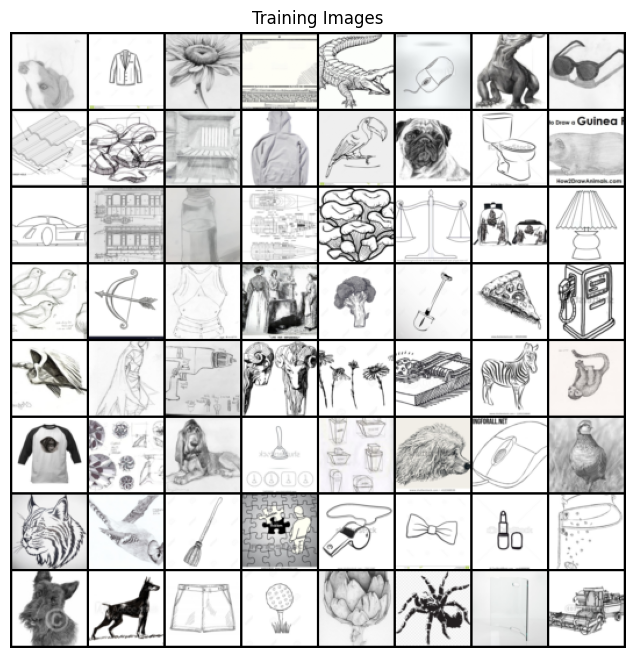

In [13]:
# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [14]:
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [15]:
# Generator Code
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)
    

# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [16]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)
    

# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [17]:
# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [21]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/200][0/118]	Loss_D: 0.0499	Loss_G: 5.2200	D(x): 0.9841	D(G(z)): 0.0309 / 0.0121
[0/200][50/118]	Loss_D: 0.2452	Loss_G: 2.7235	D(x): 0.8565	D(G(z)): 0.0541 / 0.1280
[0/200][100/118]	Loss_D: 0.0788	Loss_G: 4.4716	D(x): 0.9525	D(G(z)): 0.0265 / 0.0265
[1/200][0/118]	Loss_D: 0.1291	Loss_G: 4.8228	D(x): 0.9900	D(G(z)): 0.0996 / 0.0152
[1/200][50/118]	Loss_D: 0.3013	Loss_G: 6.9232	D(x): 0.9879	D(G(z)): 0.2249 / 0.0020
[1/200][100/118]	Loss_D: 0.1123	Loss_G: 5.3161	D(x): 0.9871	D(G(z)): 0.0899 / 0.0101
[2/200][0/118]	Loss_D: 0.0474	Loss_G: 4.9989	D(x): 0.9843	D(G(z)): 0.0300 / 0.0132
[2/200][50/118]	Loss_D: 0.0799	Loss_G: 4.8355	D(x): 0.9925	D(G(z)): 0.0646 / 0.0157
[2/200][100/118]	Loss_D: 0.1805	Loss_G: 5.2158	D(x): 0.9559	D(G(z)): 0.1068 / 0.0186
[3/200][0/118]	Loss_D: 0.1014	Loss_G: 4.0919	D(x): 0.9650	D(G(z)): 0.0591 / 0.0289
[3/200][50/118]	Loss_D: 0.0982	Loss_G: 4.0803	D(x): 0.9767	D(G(z)): 0.0629 / 0.0306
[3/200][100/118]	Loss_D: 0.0771	Loss_G: 4.6244	D(x)

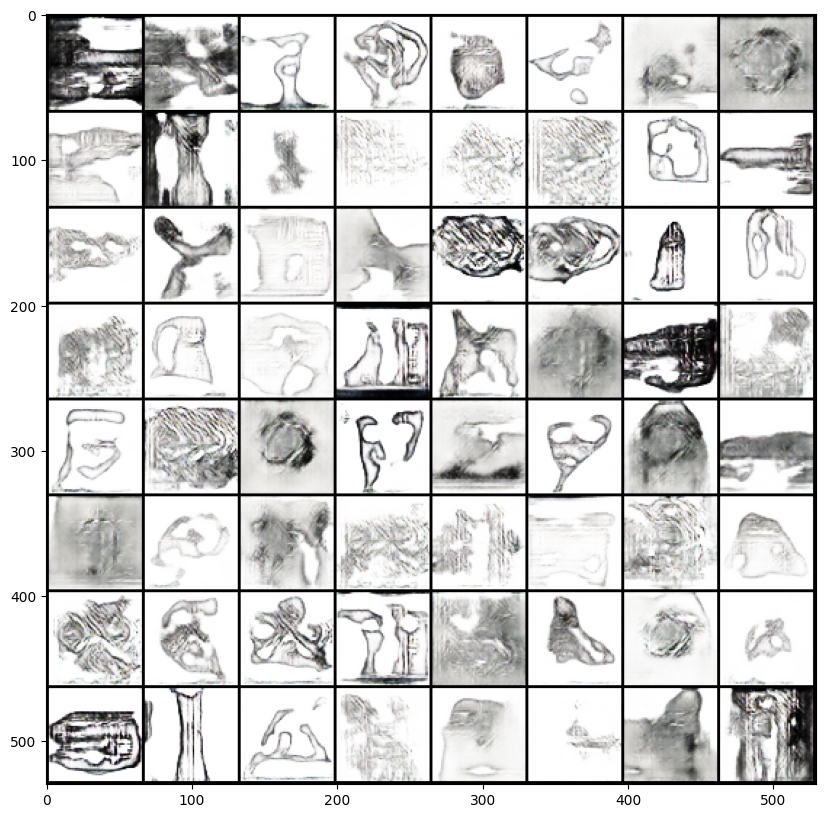

In [41]:
fig = plt.figure(figsize=(10,10))
# plt.axis("off")
# ims = [[plt.imshow(np.transpose(i,(1,2,0)))] for i in img_list]
plt.imshow(np.transpose(img_list[5],(1,2,0)))

In [17]:
folders = []
canny_dir = '/data/ephemeral/home/cv20-proj1/level1-imageclassification-cv-20/suyoung/data/canny/'

for i in range(len(image_data)):
    class_name = image_data['class_name'].values[i]
    image_path = image_data['path'].values[i]
    file_name = image_path.split('/')[-1]

    # Canny edge detection 
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(gray, 100, 200)

    if class_name in folders:
        cv2.imwrite(canny_dir+class_name+'/'+file_name, edge)
    else:
        folders.append(class_name)
        os.makedirs(canny_dir+class_name)
        cv2.imwrite(canny_dir+class_name+'/'+file_name, edge)
    
    if i % 100 == 0:
        print(f'{i}th work done')


0th work done
100th work done
200th work done
300th work done
400th work done
500th work done
600th work done
700th work done
800th work done
900th work done
1000th work done
1100th work done
1200th work done
1300th work done
1400th work done
1500th work done
1600th work done
1700th work done
1800th work done
1900th work done
2000th work done
2100th work done
2200th work done
2300th work done
2400th work done
2500th work done
2600th work done
2700th work done
2800th work done
2900th work done
3000th work done
3100th work done
3200th work done
3300th work done
3400th work done
3500th work done
3600th work done
3700th work done
3800th work done
3900th work done
4000th work done
4100th work done
4200th work done
4300th work done
4400th work done
4500th work done
4600th work done
4700th work done
4800th work done
4900th work done
5000th work done
5100th work done
5200th work done
5300th work done
5400th work done
5500th work done
5600th work done
5700th work done
5800th work done
5900th wo

In [21]:
train_chk = os.listdir('/data/ephemeral/home/cv20-proj1/level1-imageclassification-cv-20/suyoung/data/train')
canny_chk = os.listdir('/data/ephemeral/home/cv20-proj1/level1-imageclassification-cv-20/suyoung/data/canny')

for i in range(len(train_chk)):
    if train_chk[i] not in canny_chk:
        print(train_chk[i])
        print(i)

.DS_Store
172


In [25]:
import os
import shutil

source_dir = '/data/ephemeral/home/cv20-proj1/level1-imageclassification-cv-20/suyoung/data/canny'  # 원본 디렉토리 경로
destination_dir = '/data/ephemeral/home/cv20-proj1/level1-imageclassification-cv-20/suyoung/data/train'  # 대상 디렉토리 경로

source_folders = os.listdir(source_dir)
destination_folders = os.listdir(destination_dir)

for i in range(len(destination_folders)):
    if destination_folders[i] in source_folders:
        folder = destination_folders[i]
        source_images_path = os.path.join(source_dir, folder)
        source_images_list = os.listdir(source_images_path)

        for j in range(len(source_images_list)):
            source_file = source_images_list[j]
            source_file_path = os.path.join(source_images_path, source_file)
            new_name = 'edge_detected_' + source_file
            destination_file_path = os.path.join(destination_dir, folder, new_name)
            shutil.copy2(source_file_path, destination_file_path)

    else:
        print(i, destination_folders[i])

n02992211 .DS_Store
